# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [2]:
raw_data = pd.read_csv('Countries-exercise.csv')
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [3]:
features = raw_data.iloc[:,1:3]
features.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


## Plot the data

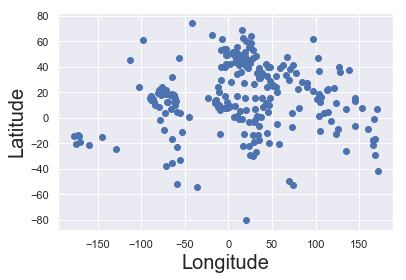

In [4]:
plt.scatter(features['Longitude'],features['Latitude'])
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()

## Clustering

Use 4 clusters initially.

In [5]:
kmeans = KMeans(4)

### Clustering results

In [6]:
clusters = kmeans.fit_predict(features)

In [7]:
raw_data['Clusters'] = clusters
raw_data.head()

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

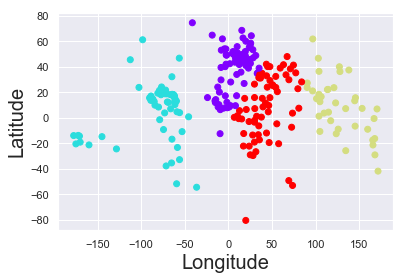

In [8]:
plt.scatter(raw_data['Longitude'],raw_data['Latitude'], c=raw_data['Clusters'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [15]:
wcss = []
data = raw_data.iloc[:,1:4]
data.head()

,Longitude,Latitude,Clusters
0,-69.982677,12.520880,1
1,66.004734,33.835231,3
2,17.537368,-12.293361,3
3,-63.064989,18.223959,1
4,20.049834,41.142450,0


In [17]:
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [18]:
wcss

[1414204.0117846348,
 657340.0264156878,
 325541.3236279924,
 256573.08675934302,
 192194.9829002524,
 151492.06937643047,
 127040.88634757188,
 102965.45370140341,
 85019.25127906208,
 76688.46893291337]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

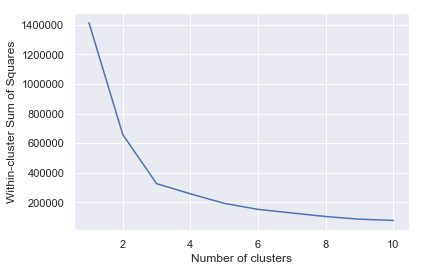

In [19]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [ ]:
#elbow at 2 and 3. I am picking 3

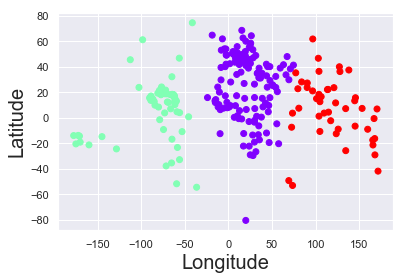

In [21]:
kmeans = KMeans(3)
clusters = kmeans.fit_predict(features)
raw_data['Clusters'] = clusters

plt.scatter(raw_data['Longitude'],raw_data['Latitude'], c=raw_data['Clusters'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()